In [1]:
!pip install pytrends

In [2]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
trending_topics = TrendReq(hl='en-US', tz=360)


In [3]:
kw_list=["Data Science"]
trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')


In [13]:
# Interest over time.
trending_topics.build_payload(kw_list=["Data Science"],
							cat=0, timeframe='today 12-m')
data_iot = trending_topics.interest_over_time()
data_iot = data_iot.sort_values(by="Data Science", ascending = False)
print(data_iot)


            Data Science  isPartial
date                               
2023-03-26           100      False
2022-09-11            97      False
2022-09-18            96      False
2022-08-21            95      False
2022-09-25            94      False
2023-06-11            92      False
2022-10-09            91      False
2022-08-28            91      False
2022-07-31            90      False
2022-10-30            89      False
2023-01-29            89      False
2023-05-21            89      False
2022-09-04            89      False
2022-08-14            89      False
2023-04-30            89      False
2022-11-06            88      False
2022-07-10            88      False
2023-02-19            87      False
2023-02-05            87      False
2022-08-07            87      False
2023-01-08            87      False
2023-06-04            87      False
2023-05-14            86      False
2023-05-07            86      False
2022-11-13            86      False
2023-02-26            85    

In [14]:
data_iot.drop(labels=['isPartial'],axis='columns',inplace=True) 

In [17]:
# Interest by Region
data_ior = trending_topics.interest_by_region()
data_ior = data_ior.sort_values(by="Data Science",
						ascending = False)
print(data_ior)


                          Data Science
geoName                               
Zimbabwe                           100
India                               85
Ethiopia                            77
Kenya                               74
Nigeria                             67
...                                ...
Guyana                               0
Haiti                                0
Heard & McDonald Islands             0
Honduras                             0
Åland Islands                        0

[250 rows x 1 columns]


In [23]:
data_ior.nunique()

Data Science    39
dtype: int64

In [26]:
data_ior.dropna(how='all',axis='columns',inplace=True)
data_ior.isnull().sum()

Data Science    0
dtype: int64

In [27]:
top_20_ior = data_ior.nlargest(20, 'Data Science')


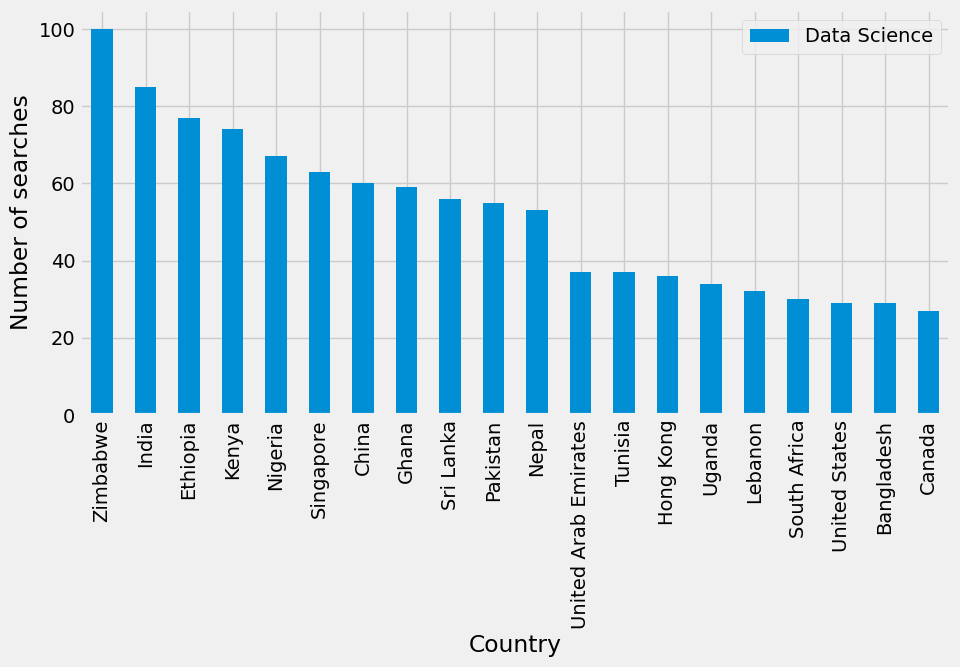

In [29]:
top_20_ior.reset_index().plot(x='geoName', y='Data Science',
						figsize=(10,5), kind="bar")
plt.style.use('fivethirtyeight')
plt.xlabel("Country")
plt.ylabel("Number of searches")
plt.show()


In [32]:
# Top charts.
df_trending_20 = trending_topics.top_charts(2020, hl='en-US',
								tz=300, geo='GLOBAL')
df_trending_20.head(10)


,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,
5,India vs New Zealand,
6,Coronavirus update,
7,Coronavirus symptoms,
8,Joe Biden,
9,Google Classroom,


In [33]:
# Top charts.
df_trending_21 = trending_topics.top_charts(2021, hl='en-US',
								tz=300, geo='GLOBAL')
df_trending_21.head(10)


,title,exploreQuery
0,Australia vs India,
1,India vs England,
2,IPL,
3,NBA,
4,Euro 2021,
5,Copa América,Copa America
6,India vs New Zealand,
7,T20 World Cup,
8,Squid Game,
9,DMX,


In [34]:
# Top charts.

df_trending_22 = trending_topics.top_charts(2022, hl='en-US',
								tz=300, geo='GLOBAL')
df_trending_22.head(10)


,title,exploreQuery
0,Wordle,
1,India vs England,
2,Ukraine,
3,Queen Elizabeth,
4,Ind vs SA,
5,World Cup,
6,India vs West Indies,
7,iPhone 14,
8,Jeffrey Dahmer,
9,Indian Premier League,


In [62]:
trending_topics.build_payload(kw_list=['Data Science'])
related_queries = trending_topics.related_queries()
related_queries.values()


dict_values([{'top':                        query  value
0        data science course    100
1            what is science     95
2       what is data science     93
3               what is data     88
4        data science python     79
5                     python     78
6          data science jobs     78
7           computer science     68
8             data analytics     63
9       data science masters     55
10            data scientist     48
11          machine learning     47
12       data science salary     46
13      data science courses     46
14       master data science     44
15                     which     44
16          data science job     35
17  data science engineering     33
18   python for data science     32
19   masters in data science     31
20             data analysis     30
21                statistics     30
22              data analyst     28
23       data science degree     28
24           ms data science     27, 'rising':                                 

In [10]:
keywords = trending_topics.suggestions(
keyword='Data Science')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')


,title,type
0,Data science,Field of study
1,The Soulmate Equation,Book by Christina Lauren
2,Finding the Mother Tree: Discovering the Wisdo...,Book by Suzanne Simard
3,Data Science Academy,Topic
4,Mathematics for Machine Learning,"Book by A. Aldo Faisal, Cheng Soon Ong, and Ma..."
